# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import streamlit as st
%matplotlib inline

# Preprocessing

In [2]:
world = pd.read_csv('world-data-2023.csv').dropna(how='any',axis=0)
world['Population'] = world['Population'].to_numpy() 
world['Population']= world['Population'].str.replace(',','')
world['Land Area(Km2)']= world['Land Area(Km2)'].str.replace(',','')
world['Armed Forces size']= world['Armed Forces size'].str.replace(',','')
world['Co2-Emissions']= world['Co2-Emissions'].str.replace(',','')
world['Urban_population']= world['Urban_population'].str.replace(',','')
world

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,652230,323000,32.49,93.0,Kabul,8672,...,78.40%,0.28,38041754,48.90%,9.30%,71.40%,11.12%,9797273,33.939110,67.709953
1,Albania,105,AL,43.10%,28748,9000,11.78,355.0,Tirana,4536,...,56.90%,1.20,2854191,55.70%,18.60%,36.60%,12.33%,1747593,41.153332,20.168331
2,Algeria,18,DZ,17.40%,2381741,317000,24.28,213.0,Algiers,150006,...,28.10%,1.72,43053054,41.20%,37.20%,66.10%,11.70%,31510100,28.033886,1.659626
3,Angola,26,AO,47.50%,1246700,117000,40.73,244.0,Luanda,34693,...,33.40%,0.21,31825295,77.50%,9.20%,49.10%,6.89%,21061025,-11.202692,17.873887
4,Argentina,17,AR,54.30%,2780400,105000,17.02,54.0,Buenos Aires,201348,...,17.60%,3.96,44938712,61.30%,10.10%,106.30%,9.79%,41339571,-38.416097,-63.616672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,United Kingdom,281,GB,71.70%,243610,148000,11.00,44.0,London,379025,...,14.80%,2.81,66834405,62.80%,25.50%,30.60%,3.85%,55908316,55.378051,-3.435973
106,United States,36,US,44.40%,9833517,1359000,11.60,1.0,"Washington, D.C.",5006302,...,11.10%,2.61,328239523,62.00%,9.60%,36.60%,14.70%,270663028,37.090240,-95.712891
107,Uruguay,20,UY,82.60%,176215,22000,13.86,598.0,Montevideo,6766,...,16.20%,5.05,3461734,64.00%,20.10%,41.80%,8.73%,3303394,-32.522779,-55.765835
108,Vietnam,314,VN,39.30%,331210,522000,16.75,84.0,Hanoi,192668,...,43.50%,0.82,96462106,77.40%,19.10%,37.60%,2.01%,35332140,14.058324,108.277199


# Exploratory Data Analysis

<AxesSubplot:xlabel='Physicians per thousand', ylabel='Population'>

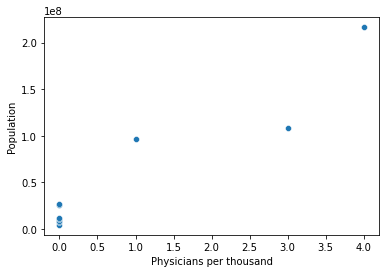

In [3]:
sampled = world.sample(frac = 0.09)
armed = sampled['Physicians per thousand'].to_numpy()
orderedphys = sorted([int(x) for x in armed])
pop = sampled['Population'].to_numpy()
orderedpop = sorted([int(x) for x in pop])
data = {'Physicians per thousand': orderedphys, 'Population': orderedpop}
df = pd.DataFrame(data)
sns.scatterplot(x = df["Physicians per thousand"], y = df["Population"])

<AxesSubplot:xlabel='Birth Rate', ylabel='Population'>

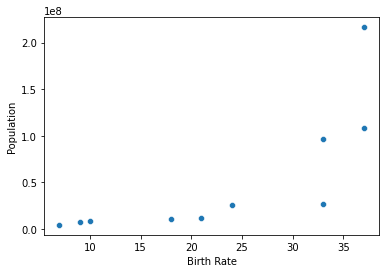

In [4]:
sampled = world.sample(frac = 0.09)
birth = sampled['Birth Rate'].to_numpy()
orderedbirth = sorted([int(x) for x in birth])
data = {'Birth Rate': orderedbirth, 'Population': orderedpop}
df = pd.DataFrame(data)
sns.scatterplot(x= df['Birth Rate'], y= df['Population'])

<AxesSubplot:xlabel='Co2-Emissions', ylabel='Population'>

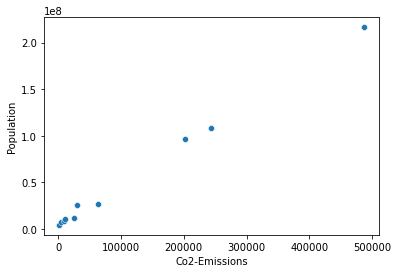

In [5]:
sampled = world.sample(frac = 0.09)
emissions = sampled['Co2-Emissions'].to_numpy()
orderedemissions = sorted([int(x) for x in emissions])
data = {'Co2-Emissions': orderedemissions, 'Population': orderedpop}
df = pd.DataFrame(data)
sns.scatterplot(x= df['Co2-Emissions'], y= df['Population'])

In [6]:
r2_score(orderedemissions, orderedpop)

0.9958158050797233

There is greatest evidence of a clear pattern/trend in the plot bwteen CO2 emissions and population, which demonstrates a reasonably strong positive correlation. This is further indicated by its high R^2 value. Thus, it seems relevant to explore the relationship between CO2 emissions and world population and devise a prediction model based on these data points.

In [7]:
pop = world[["Country", 'Co2-Emissions', 'Population']]
pop

,Country,Co2-Emissions,Population
0,Afghanistan,8672,38041754
1,Albania,4536,2854191
2,Algeria,150006,43053054
3,Angola,34693,31825295
4,Argentina,201348,44938712
...,...,...,...
105,United Kingdom,379025,66834405
106,United States,5006302,328239523
107,Uruguay,6766,3461734
108,Vietnam,192668,96462106


In [8]:
urbanpop = world[["Country", 'Co2-Emissions', 'Urban_population']]
urbanpop

,Country,Co2-Emissions,Urban_population
0,Afghanistan,8672,9797273
1,Albania,4536,1747593
2,Algeria,150006,31510100
3,Angola,34693,21061025
4,Argentina,201348,41339571
...,...,...,...
105,United Kingdom,379025,55908316
106,United States,5006302,270663028
107,Uruguay,6766,3303394
108,Vietnam,192668,35332140


# Train Test Split

In [9]:
x= sorted([int(x) for x in pop['Co2-Emissions'].to_numpy()]) 
y= sorted([int(x) for x in pop['Population'].to_numpy()]) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

# Linear Regression Model

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred_train = lr.predict(x_train)
train = pd.DataFrame({"Co2-Emissions": x_train.flatten(), "Predicted Population": y_pred_train, "True Population": y_train})
train

,Co2-Emissions,Predicted Population,True Population
0,7943,5.543105e+06,6545502
1,248289,6.801403e+07,66834405
2,5156,4.818705e+06,3225167
3,25280,1.004935e+07,18513930
4,102218,3.004714e+07,42813238
...,...,...,...
61,28830,1.097207e+07,18952038
62,620302,1.647079e+08,200963599
63,543,3.619691e+06,483628
64,12633,6.762133e+06,10023318


In [12]:
y_pred_test = lr.predict(x_test)
test = pd.DataFrame({"Co2-Emissions": x_test.flatten(), "Predicted Population": y_pred_test, "True Population": y_test})
test

,Co2-Emissions,Predicted Population,True Population
0,8988,5.814722e+06,7169455
1,29937,1.125980e+07,19356544
2,5310,4.858733e+06,3461734
3,7004,5.299039e+06,5266535
4,17910,8.133735e+06,11694719
5,96889,2.866202e+07,37970874
6,25368,1.007222e+07,18628747
7,10902,6.312210e+06,9746117
8,201150,5.576162e+07,50339443
9,1342,3.827367e+06,1331824


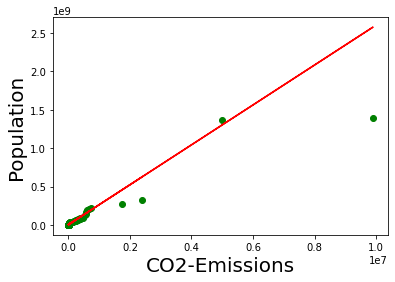

In [13]:
plt.scatter(x, y, color = "green")
plt.xlabel('CO2-Emissions', fontsize = 20)
plt.ylabel('Population', fontsize = 20)
x_test_flat = x_test.flatten()
y_pred_test_flat= y_pred_test.flatten()
plt.plot(x_test_flat, y_pred_test_flat, color = "red")
plt.show()

In [14]:
r2_score(y_test, y_pred_test)

0.2448674168610927

# XG Boost Regression Model

In [15]:
xgb_reg = XGBRegressor(random_state=0)
xgb_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [16]:
y_pred_train = xgb_reg.predict(x_train)
train = pd.DataFrame({"Co2-Emissions": x_train.flatten(), "Predicted Population": y_pred_train, "True Population": y_train})
train

,Co2-Emissions,Predicted Population,True Population
0,7943,6.548717e+06,6545502
1,248289,6.683412e+07,66834405
2,5156,3.226822e+06,3225167
3,25280,1.851278e+07,18513930
4,102218,4.280244e+07,42813238
...,...,...,...
61,28830,1.894464e+07,18952038
62,620302,2.009703e+08,200963599
63,543,4.809459e+05,483628
64,12633,1.002238e+07,10023318


In [17]:
y_pred_test = xgb_reg.predict(x_test)
test = pd.DataFrame({"Co2-Emissions": x_test.flatten(), "Predicted Population": y_pred_test, "True Population": y_test})
test

,Co2-Emissions,Predicted Population,True Population
0,8988,7.042831e+06,7169455
1,29937,1.894464e+07,19356544
2,5310,3.226822e+06,3461734
3,7004,5.057350e+06,5266535
4,17910,1.149535e+07,11694719
5,96889,3.699514e+07,37970874
6,25368,1.851278e+07,18628747
7,10902,9.331365e+06,9746117
8,201150,4.708217e+07,50339443
9,1342,8.804894e+05,1331824


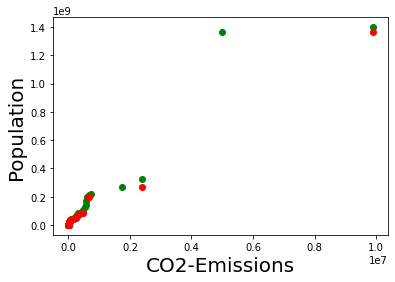

In [18]:
plt.scatter(x, y, color = "green")
plt.xlabel('CO2-Emissions', fontsize = 20)
plt.ylabel('Population', fontsize = 20)
x_test_flat = x_test.flatten()
y_pred_test_flat= y_pred_test.flatten()
plt.scatter(x_test_flat, y_pred_test_flat, color = "red")
plt.show()

In [19]:
r2_score(y_test, y_pred_test)

0.9974321653078632

# Random Forest Regression Model

In [20]:
randforest = RandomForestRegressor(n_estimators=100, random_state=0)
randforest.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [21]:
y_pred_train = randforest.predict(x_train)
train = pd.DataFrame({"Co2-Emissions": x_train.flatten(), "Predicted Population": y_pred_train, "True Population": y_train})
train

,Co2-Emissions,Predicted Population,True Population
0,7943,6.631711e+06,6545502
1,248289,6.411526e+07,66834405
2,5156,3.226947e+06,3225167
3,25280,1.815530e+07,18513930
4,102218,4.037599e+07,42813238
...,...,...,...
61,28830,1.867207e+07,18952038
62,620302,1.853040e+08,200963599
63,543,4.627523e+05,483628
64,12633,9.942580e+06,10023318


In [22]:
y_pred_test = randforest.predict(x_test)
test = pd.DataFrame({"Co2-Emissions": x_test.flatten(), "Predicted Population": y_pred_test, "True Population": y_test})
test

,Co2-Emissions,Predicted Population,True Population
0,8988,7.300647e+06,7169455
1,29937,1.922778e+07,19356544
2,5310,3.226947e+06,3461734
3,7004,5.427132e+06,5266535
4,17910,1.119856e+07,11694719
5,96889,4.037599e+07,37970874
6,25368,1.815530e+07,18628747
7,10902,9.028790e+06,9746117
8,201150,4.838885e+07,50339443
9,1342,9.174657e+05,1331824


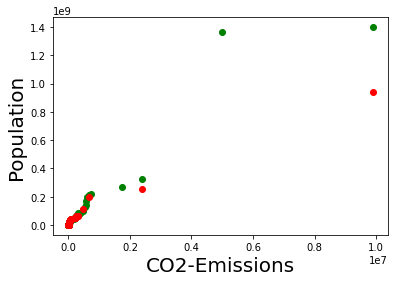

In [23]:
plt.scatter(x, y, color = "green")
plt.xlabel('CO2-Emissions', fontsize = 20)
plt.ylabel('Population', fontsize = 20)
x_test_flat = x_test.flatten()
y_pred_test_flat= y_pred_test.flatten()
plt.scatter(x_test_flat, y_pred_test_flat, color = "red")
plt.show()

In [24]:
r2_score(y_test, y_pred_test)

0.891114879517811

# Summary and Insights

Creating a machine learning model to explore the relationship between data of various factors within a country and its world population was both insightful and revealing. The use of train and test data allowed for a thorough analysis, as well as the ability to use CO2 emissions as a reasonable predictor of world population. Exploration of the data revealed a positive correlation between CO2 emissions and world population. Generally, higher CO2 emissions are associated with more industrial activity and greater energy consumption, which often corresponds with higher population density and urbanization. Among the regression models of linear, which fits a straight line that minimizes the difference between the predicted values and the true values of data points, XG Boost, which uses decision trees and supervised learning to predict continuous values by minimizing errors iteratively, and Random Forest, which averages predictions from multiple decision trees to improve accuracy and reduce overfitting, the XG boost regression model emerged as the most robust in this context, with the greatest measured performance on the test data set of the models in most cases.
